# DATA IMPUTATION USING KNN

It identifies the K nearest neighbors (defaulting to Euclidean distance), calculates the mean or weighted mean of their available values, and uses that result to replace the missing data.

## EXAMPLE 1

In [29]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer

In [24]:
# Read the dataset from specified path
df = pd.read_csv('heart_disease_uci.csv')

# Display the first 2 rows of the dataset
df.head(2)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2


In [25]:
# Display summary information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In this example, only the columns related to age, sex, chest pain experience, resting blood pressure, cholesterol levels, fasting blood sugar, and resting electrocardiographic measurements are used from the given dataset.

In [26]:
# Check the missing values
df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [27]:
# Remove unnessary columns
df = df.iloc[:, 1:-6]
del df['dataset']

# Display the first 2 rows
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0


In [28]:
# Retrieve the unique values from object columns and print them
unique_values = df['sex'].unique()
print('sex:', unique_values)

unique_values = df['fbs'].unique()
print('fbs:', unique_values)

unique_values = df['restecg'].unique()
print('restecg:', unique_values)

sex: ['Male' 'Female']
fbs: [True False nan]
restecg: ['lv hypertrophy' 'normal' 'st-t abnormality' nan]


In [63]:
df.replace('nan', np.nan, inplace=True)

In [64]:
# Select columns to encode
categorical_cols = ['sex', 'dataset', 'cp', 'fbs', 'restecg', 'exang']

encoder = LabelEncoder()
for col in categorical_cols:
    # Save the original NaN values
    nan_mask = df[col].isna()

    # Encode the column and replace NaN with the original NaN values
    df[col] = encoder.fit_transform(df[col].astype(str))

    # Restore the NaN values back to their positions
    df.loc[nan_mask, col] = np.nan

In [65]:
df.isnull().sum()

id           0
age          0
sex          0
dataset      0
cp           0
trestbps    59
chol        30
fbs         90
restecg      2
thalch      55
exang       55
oldpeak     62
dtype: int64

In [71]:
imputer = KNNImputer(n_neighbors=3)
imputed_data = imputer.fit_transform(df)

In [72]:
df_imputed = pd.DataFrame(imputed_data, columns=df.columns)

In [76]:
df_imputed.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
dtype: int64

In [77]:
df

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak
0,1,63,1.0,0.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3
1,2,67,1.0,0.0,0.0,160.0,286.0,0.0,0.0,108.0,1.0,1.5
2,3,67,1.0,0.0,0.0,120.0,229.0,0.0,0.0,129.0,1.0,2.6
3,4,37,1.0,0.0,2.0,130.0,250.0,0.0,2.0,187.0,0.0,3.5
4,5,41,0.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4
...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,0.0,3.0,0.0,127.0,333.0,1.0,3.0,154.0,0.0,0.0
916,917,62,1.0,3.0,3.0,NaN,139.0,0.0,3.0,NaN,NaN,NaN
917,918,55,1.0,3.0,0.0,122.0,223.0,1.0,3.0,100.0,0.0,0.0
918,919,58,1.0,3.0,0.0,NaN,385.0,1.0,0.0,NaN,NaN,NaN


In [88]:
print("🔹 Row 305 from the original DataFrame:")
print(df.iloc[305])

# Print row 305 from the imputed DataFrame
print("\n🔹 Row 305 from the imputed DataFrame:")
print(df_imputed.iloc[305])

🔹 Row 305 from the original DataFrame:
id          306.0
age          29.0
sex           1.0
dataset       1.0
cp            1.0
trestbps    140.0
chol          NaN
fbs           0.0
restecg       2.0
thalch      170.0
exang         0.0
oldpeak       0.0
Name: 305, dtype: float64

🔹 Row 305 from the imputed DataFrame:
id               306.0
age               29.0
sex               True
dataset            1.0
cp                 1.0
trestbps         140.0
chol        217.666667
fbs                0.0
restecg            2.0
thalch           170.0
exang              0.0
oldpeak            0.0
Name: 305, dtype: object


c:\Users\temulenbd\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128313 (\N{SMALL BLUE DIAMOND}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


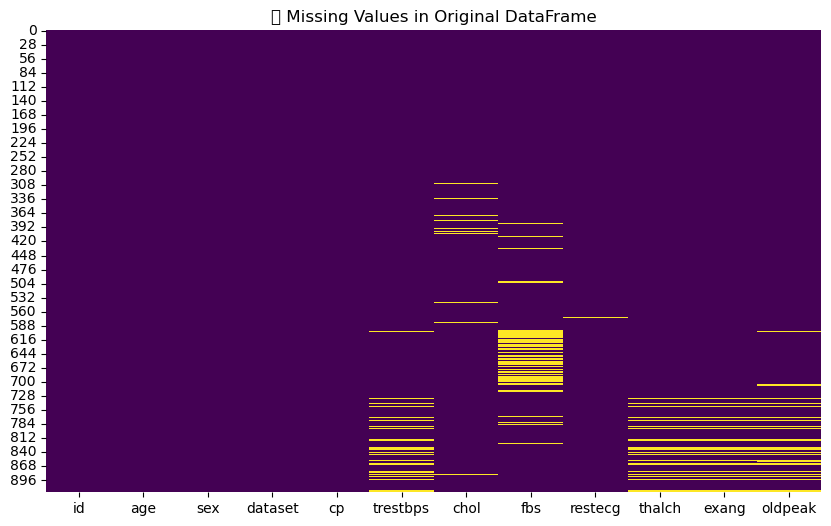

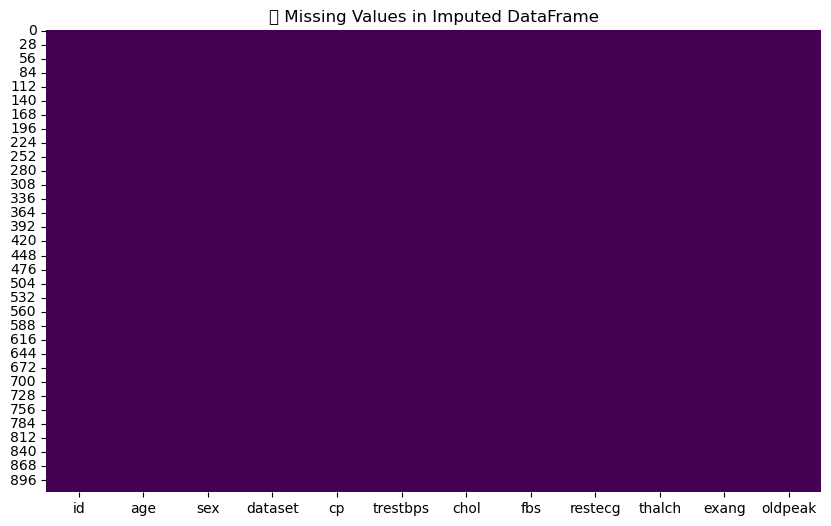

In [ ]:
# Visualizing missing values in the original DataFrame (df)
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("🔹 Missing Values in Original DataFrame")
plt.show()

# Visualizing missing values in the imputed DataFrame (df_imputed)
plt.figure(figsize=(10, 6))
sns.heatmap(df_imputed.isnull(), cbar=False, cmap='viridis')
plt.title("🔹 Missing Values in Imputed DataFrame")
plt.show()
